In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
pd.pandas.set_option("display.max_columns", None)

In [2]:
dataset = pd.read_csv("./data/insurance.csv")

In [3]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [4]:
dataset[dataset.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [5]:
dataset.drop_duplicates(inplace=True)

In [6]:
dataset.shape

(1337, 7)

In [7]:
dataset.sample(5)

,age,sex,bmi,children,smoker,region,expenses
653,45,female,36.3,2,no,southeast,8527.53
702,53,male,41.5,0,no,southeast,9504.31
1170,18,male,27.4,1,yes,northeast,17178.68
934,32,male,37.2,2,no,southeast,4673.39
848,27,female,24.1,0,no,southwest,2974.13


In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

In [9]:
dataset["sex"] = encoder.fit_transform(dataset["sex"])
dataset["smoker"] = encoder.fit_transform(dataset["smoker"])
dataset["region"] = encoder.fit_transform(dataset["region"])

In [10]:
dataset.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,0,27.9,0,1,3,16884.92
1,18,1,33.8,1,0,2,1725.55
2,28,1,33.0,3,0,2,4449.46
3,33,1,22.7,0,0,1,21984.47
4,32,1,28.9,0,0,1,3866.86


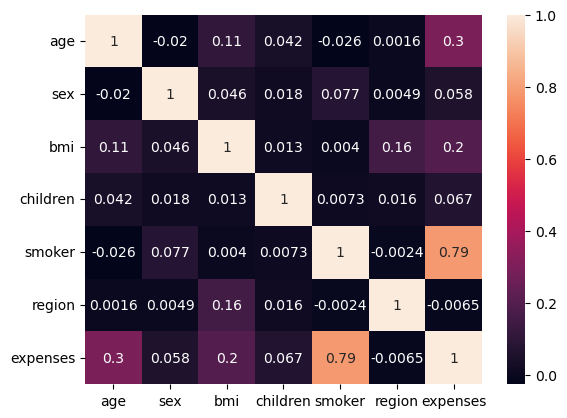

In [11]:
sns.heatmap(dataset.corr(), annot=True)
plt.show()

C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


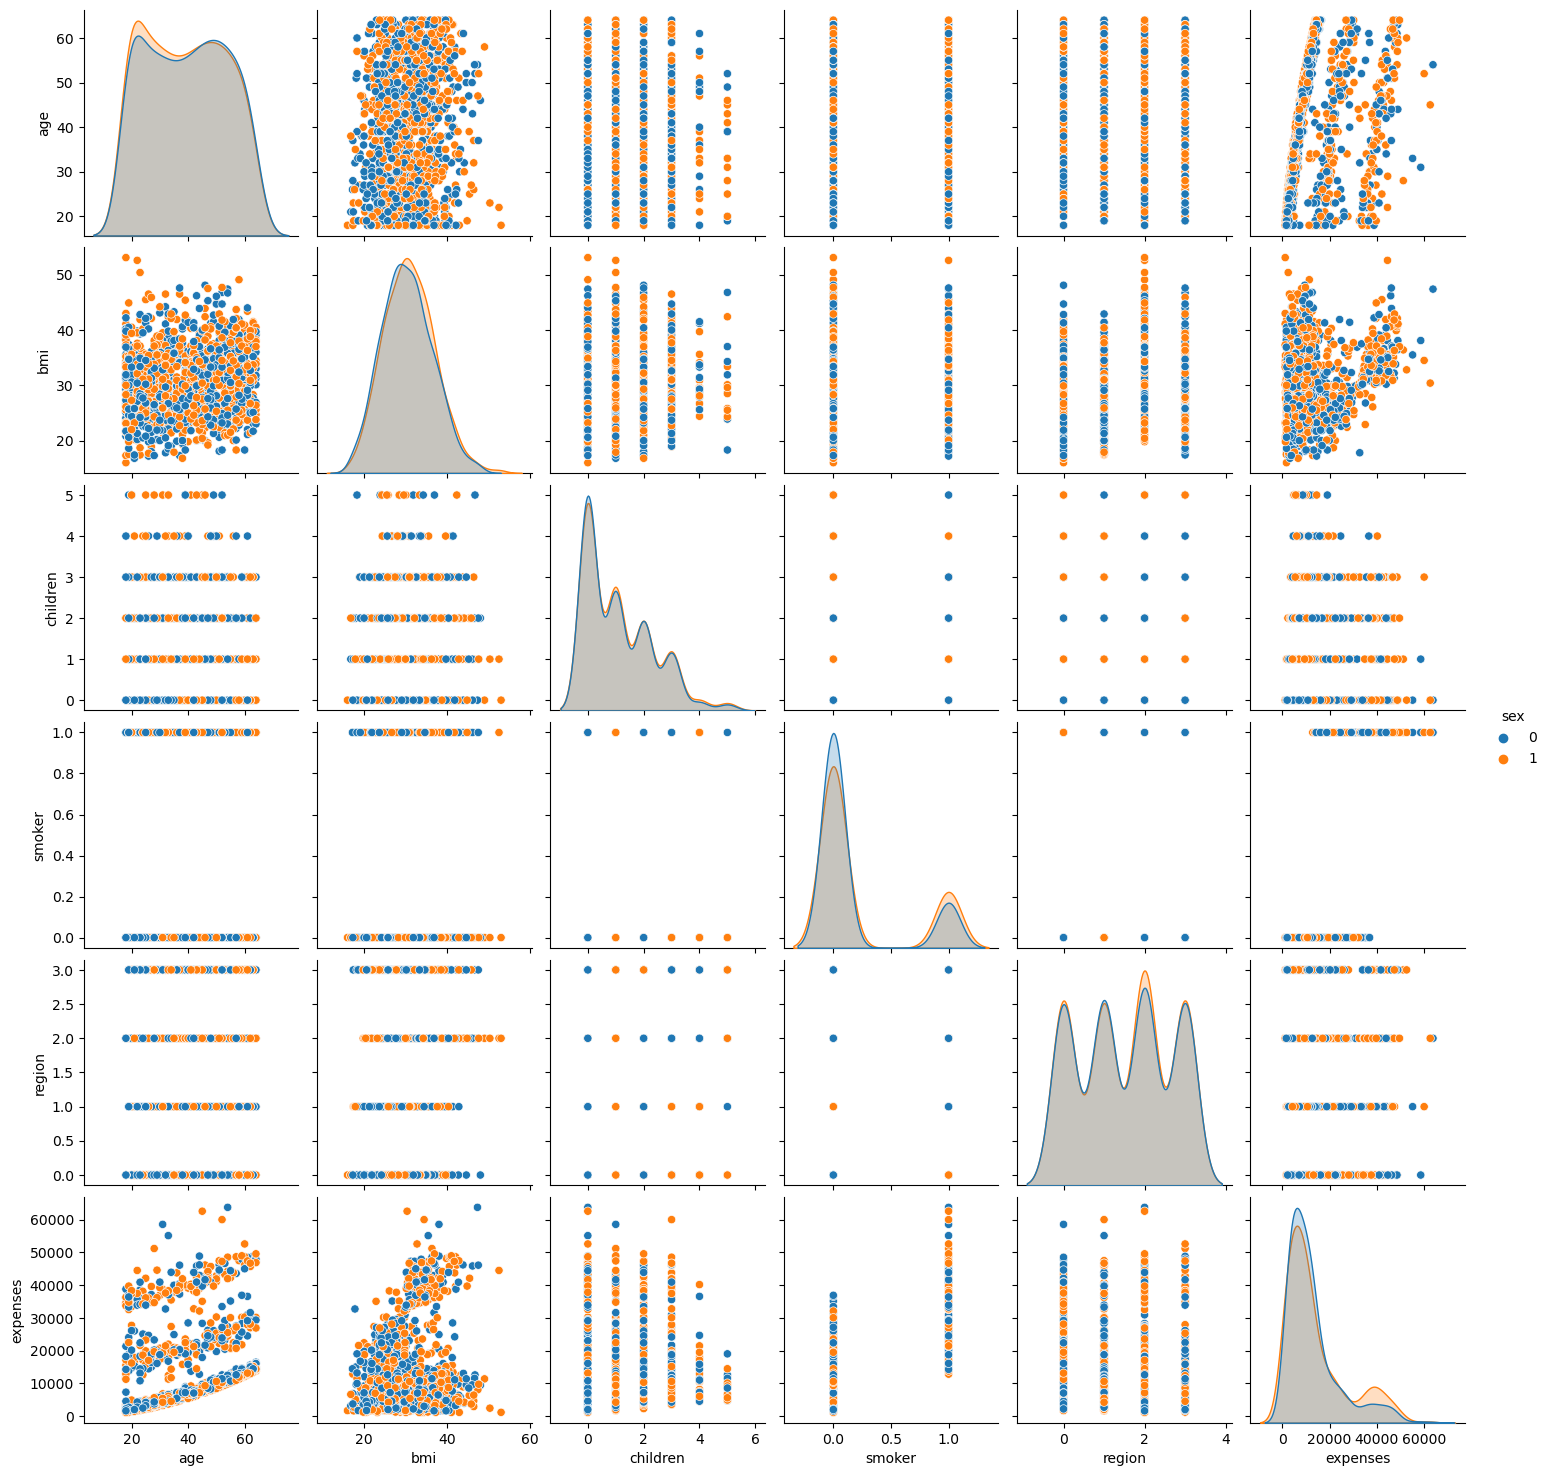

In [12]:
sns.pairplot(dataset, hue="sex")
plt.show()

In [13]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [14]:
x.head()

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,3
1,18,1,33.8,1,0,2
2,28,1,33.0,3,0,2
3,33,1,22.7,0,0,1
4,32,1,28.9,0,0,1


In [15]:
y.head()

0    16884.92
1     1725.55
2     4449.46
3    21984.47
4     3866.86
Name: expenses, dtype: float64

In [16]:
x.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
dtype: object

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33, random_state=42
)

In [18]:
x_train.shape

(895, 6)

In [19]:
x_test.shape

(442, 6)

In [20]:
y_train.shape

(895,)

In [21]:
y_test.shape

(442,)

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [23]:
x_train_scaled = scaler.fit_transform(x_train)

In [24]:
x_test_scaled = scaler.transform(x_test)

In [25]:
import lazypredict
from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle

In [26]:
lazy_reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predicitions = lazy_reg.fit(x_train, x_test, y_train, y_test)

 67%|██████████████████████████████████████████████████████▋                           | 28/42 [00:02<00:01, 10.69it/s]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [00:05<00:00,  8.04it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 248
[LightGBM] [Info] Number of data points in the train set: 895, number of used features: 6
[LightGBM] [Info] Start training from score 13016.652014


In [27]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
GradientBoostingRegressor,0.87,0.87,4718.74,0.19
RandomForestRegressor,0.87,0.87,4754.65,0.67
HistGradientBoostingRegressor,0.86,0.86,4835.95,0.49
LGBMRegressor,0.86,0.86,4920.51,0.08
BaggingRegressor,0.85,0.85,5000.28,0.06
ExtraTreesRegressor,0.84,0.84,5163.91,0.45
KNeighborsRegressor,0.84,0.84,5211.25,0.03
XGBRegressor,0.83,0.83,5357.03,1.45
AdaBoostRegressor,0.82,0.82,5539.00,0.03


In [28]:
from sklearn.linear_model import LinearRegression

lregression = LinearRegression()

In [29]:
lregression.fit(x_train_scaled, y_train)

LinearRegression()

In [30]:
y_pred = lregression.predict(x_test_scaled)

In [31]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)
print(score)

0.7733793745803175


In [32]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

In [33]:
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [34]:
y_pred = gbr.predict(x_test)

In [35]:
score = r2_score(y_test, y_pred)
print(score)

0.8707266409393226


In [36]:
from sklearn.model_selection import GridSearchCV

parameter = {"n_estimators": [10, 30, 50, 70]}
grid = GridSearchCV(gbr, parameter, cv=4, verbose=2)

In [37]:
grid.fit(x_train, y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=10; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ....................................n_estimators=30; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_estimators=50; total time=   0.0s
[CV] END ....................................n_es

GridSearchCV(cv=4, estimator=GradientBoostingRegressor(),
             param_grid={'n_estimators': [10, 30, 50, 70]}, verbose=2)

In [38]:
grid.best_score_

0.8452398359195288

In [39]:
grid.best_params_

{'n_estimators': 30}

In [40]:
best_params = grid.best_params_
gbr = GradientBoostingRegressor(**best_params)
gbr.fit(x_train, y_train)
score = gbr.score(x_test, y_test)
print("Test Score : ", score)

Test Score :  0.8731735017295845


In [41]:
ypred = gbr.predict(x_test)

In [42]:
score = r2_score(y_test, y_pred)
print(score)

0.8707266409393226
